In [1]:
# type your code here
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')
pd.options.display.max_columns = None
pd.options.display.max_rows = None     
pd.options.display.float_format = '{:.6f}'.format 
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels
import statsmodels.api as sm

from sklearn.metrics import r2_score,mean_squared_error
from scipy import stats
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

In [2]:
attributes = pd.read_excel("attributes_description.xlsx")
event_holiday = pd.read_excel("Events_HolidaysData.xlsx")
me = pd.read_excel("macro_economic.xlsx")

train = pd.read_csv("train.csv")
weather = pd.read_excel("WeatherData.xlsx")

In [209]:
submission = pd.read_csv("submission.csv")

In [3]:
train.head()

,Year,Month,ProductCategory,Sales(In ThousandDollars)
0,2009,1,WomenClothing,1755.000000
1,2009,1,MenClothing,524.000000
2,2009,1,OtherClothing,936.000000
3,2009,2,WomenClothing,1729.000000
4,2009,2,MenClothing,496.000000


In [4]:
train.shape

(180, 4)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year                       180 non-null    int64  
 1   Month                      180 non-null    int64  
 2   ProductCategory            180 non-null    object 
 3   Sales(In ThousandDollars)  170 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 5.8+ KB


In [6]:
train.describe()

,Year,Month,Sales(In ThousandDollars)
count,180.000000,180.000000,170.000000
mean,2011.000000,6.500000,1616.729412
std,1.418158,3.461682,1158.224405
min,2009.000000,1.000000,471.000000
25%,2010.000000,3.750000,704.000000
50%,2011.000000,6.500000,1041.000000
75%,2012.000000,9.250000,2609.750000
max,2013.000000,12.000000,4865.000000


In [7]:
train.isnull().sum()/train.shape[0]*100

Year                        0.000000
Month                       0.000000
ProductCategory             0.000000
Sales(In ThousandDollars)   5.555556
dtype: float64

In [8]:
train.dropna(inplace=True)

In [9]:
train.isnull().sum()

Year                         0
Month                        0
ProductCategory              0
Sales(In ThousandDollars)    0
dtype: int64

<AxesSubplot:>

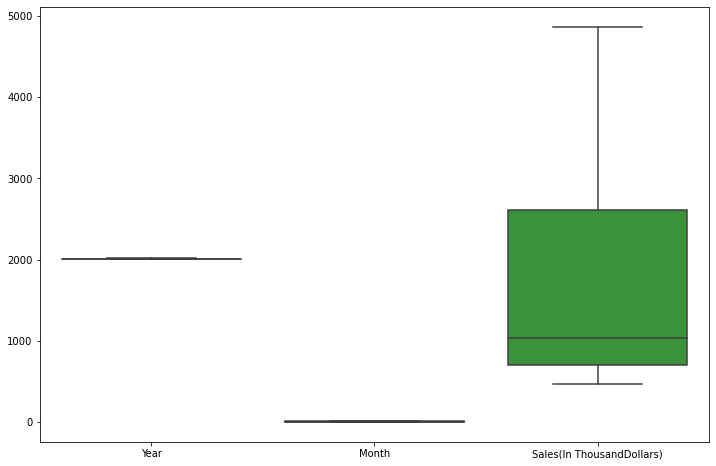

In [10]:
plt.figure(figsize=[12,8])
sns.boxplot(data = train)

In [11]:
train.columns

Index(['Year', 'Month', 'ProductCategory', 'Sales(In ThousandDollars)'], dtype='object')

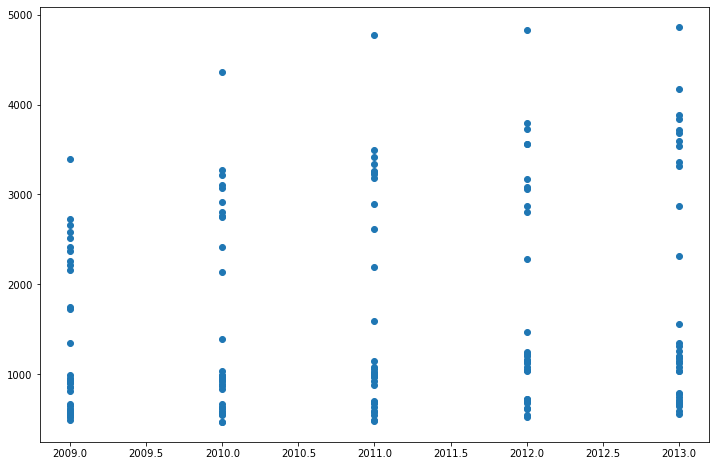

In [12]:
plt.figure(figsize=[12,8])
plt.scatter(train.Year,train['Sales(In ThousandDollars)'])

<AxesSubplot:>

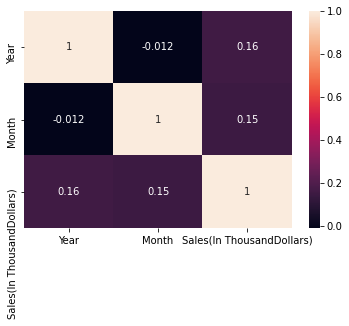

In [13]:
sns.heatmap(train.corr(), annot=True)

In [14]:
X = train.drop('Sales(In ThousandDollars)' ,axis=1)
y = train['Sales(In ThousandDollars)']

In [15]:
from sklearn.preprocessing import OneHotEncoder

In [16]:
#enc = OneHotEncoder(handle_unknown='ignore')

In [17]:
#enc.fit(X)

In [18]:
#X = enc.transform(X).toarray()

In [19]:
X = pd.get_dummies(data = X)

In [20]:
X

,Year,Month,ProductCategory_MenClothing,ProductCategory_OtherClothing,ProductCategory_WomenClothing
0,2009,1,0,0,1
1,2009,1,1,0,0
2,2009,1,0,1,0
3,2009,2,0,0,1
4,2009,2,1,0,0
5,2009,2,0,1,0
6,2009,3,0,0,1
7,2009,3,1,0,0
8,2009,3,0,1,0
9,2009,4,0,0,1


In [21]:
from sklearn.linear_model import LinearRegression

In [284]:
lr = LinearRegression()

In [285]:
lr.fit(X,ytrain)

LinearRegression()

In [286]:
y_pred = lr.predict(submission)

In [211]:
submission.head()

,Year,Month,ProductCategory,Unnamed: 3,Sales(In ThousandDollars)
0,2014,1,WomenClothing,nan,nan
1,2014,1,MenClothing,nan,nan
2,2014,1,OtherClothing,nan,nan
3,2014,2,WomenClothing,nan,nan
4,2014,2,MenClothing,nan,nan


In [212]:
submission.columns

Index(['Year', 'Month', 'ProductCategory', 'Unnamed: 3',
       'Sales(In ThousandDollars)'],
      dtype='object')

In [213]:
submission.drop(['Unnamed: 3','Sales(In ThousandDollars)'], axis=1, inplace=True)

In [214]:
submission = pd.get_dummies(submission)

In [215]:
submission.shape

(36, 5)

In [216]:
submission.isnull().sum()

Year                             0
Month                            0
ProductCategory_MenClothing      0
ProductCategory_OtherClothing    0
ProductCategory_WomenClothing    0
dtype: int64

In [287]:
first_model = pd.DataFrame({'Year':np.arange(1,37),'Sales(In ThousandDollars)':y_pred})
first_model.to_csv('first_model.csv', index=None)

In [ ]:
second_model = pd.DataFrame({'Year':np.arange(1,37),'Sales(In ThousandDollars)':ypred_sgd})
second_model.to_csv('second.csv', index=None)

In [ ]:
submission.head()

In [289]:
import xgboost 

In [290]:
xg = xgboost.XGBRegressor()
xg_reg= xg.fit(X, ytrain)

In [ ]:
X.shape

In [ ]:
y.shape

In [ ]:
submission.shape

In [291]:
ypred_xg= xg_reg.predict(submission)

In [292]:
third = pd.DataFrame({'Year':np.arange(1,37),'Sales(In ThousandDollars)':ypred_xg})
third.to_csv('third_model.csv', index=None)

In [293]:
tuned_parameters = [{'alpha':[0.0001, 0.001, 0.01, 0.1, 1]}]
enet = ElasticNet()
enet_grid = GridSearchCV(estimator = xg_reg,param_grid=tuned_parameters,cv=5)
enet_grid.fit(X,ytrain)
print('Best parameters for Elastic Net Regression: ',enet_grid.best_params_, '\n')

Best parameters for Elastic Net Regression:  {'alpha': 0.0001} 



In [294]:
enet.fit(X,ytrain)

ElasticNet()

In [295]:
ypred = enet.predict(submission)

In [297]:
fifth = pd.DataFrame({'Year':np.arange(1,37),'Sales(In ThousandDollars)':ypred})
fifth.to_csv('fifth.csv', index=None)

In [299]:
import time

In [301]:
t0 = time.time()
lr_y = submission['Year'].values
lr_y_fit = lr.predict(X)
lr_y_pred = lr.predict(submission)
tF = time.time()

lr_residuals = lr_y_pred - lr_y
#lr_rmse = np.sqrt(np.sum(np.power(lr_residuals,2)) / len(lr_residuals))
#print('RMSE = %.2f' % lr_rmse)
#print('Time to train = %.2f seconds' % (tF - t0))
## RMSE = 8.61 
## Time to train = 0.00 seconds

In [302]:
sixth = pd.DataFrame({'Year':np.arange(1,37),'Sales(In ThousandDollars)':lr_y_pred})
sixth.to_csv('sixth.csv', index=None)

In [25]:
me.head()

,Year-Month,Monthly Nominal GDP Index (inMillion$),Monthly Real GDP Index (inMillion$),CPI,PartyInPower,unemployment rate,CommercialBankInterestRateonCreditCardPlans,"Finance Rate on Personal Loans at Commercial Banks, 24 Month Loan",Earnings or wages in dollars per hour,AdvertisingExpenses (in Thousand Dollars),Cotton Monthly Price - US cents per Pound(lbs),Change(in%),Average upland planted(million acres),Average upland harvested(million acres),yieldperharvested acre,Production (in 480-lb netweright in million bales),Mill use (in 480-lb netweright in million bales),Exports
0,2009 - Jan,14421.752895,14407.053343,233.402000,Democrats,7.800000,12.030000,11.440000,22.050000,137,57.700000,4.020000,9.296000,7.559000,799,12.589000,4.170000,11.550000
1,2009 - Feb,14389.200466,14366.176571,234.663000,Democrats,8.300000,12.970000,11.050000,22.220000,200,55.210000,-4.320000,9.296000,7.559000,799,12.589000,3.870000,11.100000
2,2009 - Mar,14340.701639,14351.786822,235.067000,Democrats,8.700000,12.970000,11.050000,22.220000,?,51.500000,-6.720000,9.296000,7.559000,799,12.589000,3.720000,11.650000
3,2009 - Apr,14326.815525,14351.601731,235.582000,Democrats,9.000000,12.970000,11.050000,22.130000,214,56.780000,10.250000,9.296000,7.559000,787,12.400000,3.620000,12.225000
4,2009 - May,14345.904809,14368.123959,235.975000,Democrats,9.400000,13.320000,11.250000,22.040000,?,61.950000,9.110000,9.297000,7.400000,803,12.384000,3.520000,12.300000


In [27]:
me.isnull().sum()

Year-Month                                                           0
Monthly Nominal GDP Index (inMillion$)                               0
Monthly Real GDP Index (inMillion$)                                  0
CPI                                                                  0
PartyInPower                                                         0
unemployment rate                                                    0
CommercialBankInterestRateonCreditCardPlans                          0
Finance Rate on Personal Loans at Commercial Banks, 24 Month Loan    0
Earnings or wages  in dollars per hour                               0
AdvertisingExpenses (in Thousand Dollars)                            0
Cotton Monthly Price - US cents per Pound(lbs)                       0
Change(in%)                                                          0
Average upland planted(million acres)                                0
Average upland harvested(million acres)                              0
yieldp

In [61]:
train.head()

,Year,Month,ProductCategory,Sales(In ThousandDollars)
0,2009,1,WomenClothing,1755.000000
1,2009,1,MenClothing,524.000000
2,2009,1,OtherClothing,936.000000
3,2009,2,WomenClothing,1729.000000
4,2009,2,MenClothing,496.000000


In [62]:
train.drop('Month', axis=1, inplace=True)

In [63]:
train.columns

Index(['Year', 'ProductCategory', 'Sales(In ThousandDollars)'], dtype='object')

In [36]:
pt=pd.pivot_table(data=train,index='Year',columns='ProductCategory',values='Sales(In ThousandDollars)',aggfunc='count',fill_value=0)
pt.head()

ProductCategory,MenClothing,OtherClothing,WomenClothing
Year,,,
2009,12,12,12
2010,11,11,11
2011,11,11,11
2012,11,11,11
2013,12,11,12


In [64]:
event_holiday.head()

,Year,MonthDate,Event,DayCategory
0,2009,2001-01-01,New Year's Day,Federal Holiday
1,2009,2019-01-01,Martin Luther King Jr. Day,Federal Holiday
2,2009,2014-02-01,Valentine's Day,Event
3,2009,2016-02-01,Presidents' Day,Federal Holiday
4,2009,2012-04-01,Easter Sunday,Event


In [65]:
me.head()

,Monthly Nominal GDP Index (inMillion$),Monthly Real GDP Index (inMillion$),CPI,PartyInPower,unemployment rate,CommercialBankInterestRateonCreditCardPlans,"Finance Rate on Personal Loans at Commercial Banks, 24 Month Loan",Earnings or wages in dollars per hour,AdvertisingExpenses (in Thousand Dollars),Cotton Monthly Price - US cents per Pound(lbs),Change(in%),Average upland planted(million acres),Average upland harvested(million acres),yieldperharvested acre,Production (in 480-lb netweright in million bales),Mill use (in 480-lb netweright in million bales),Exports,Year
0,14421.752895,14407.053343,233.402000,Democrats,7.800000,12.030000,11.440000,22.050000,137,57.700000,4.020000,9.296000,7.559000,799,12.589000,4.170000,11.550000,2009
1,14389.200466,14366.176571,234.663000,Democrats,8.300000,12.970000,11.050000,22.220000,200,55.210000,-4.320000,9.296000,7.559000,799,12.589000,3.870000,11.100000,2009
2,14340.701639,14351.786822,235.067000,Democrats,8.700000,12.970000,11.050000,22.220000,?,51.500000,-6.720000,9.296000,7.559000,799,12.589000,3.720000,11.650000,2009
3,14326.815525,14351.601731,235.582000,Democrats,9.000000,12.970000,11.050000,22.130000,214,56.780000,10.250000,9.296000,7.559000,787,12.400000,3.620000,12.225000,2009
4,14345.904809,14368.123959,235.975000,Democrats,9.400000,13.320000,11.250000,22.040000,?,61.950000,9.110000,9.297000,7.400000,803,12.384000,3.520000,12.300000,2009


In [67]:
me.head()

,Monthly Nominal GDP Index (inMillion$),Monthly Real GDP Index (inMillion$),CPI,PartyInPower,unemployment rate,CommercialBankInterestRateonCreditCardPlans,"Finance Rate on Personal Loans at Commercial Banks, 24 Month Loan",Earnings or wages in dollars per hour,AdvertisingExpenses (in Thousand Dollars),Cotton Monthly Price - US cents per Pound(lbs),Change(in%),Average upland planted(million acres),Average upland harvested(million acres),yieldperharvested acre,Production (in 480-lb netweright in million bales),Mill use (in 480-lb netweright in million bales),Exports,Year
0,14421.752895,14407.053343,233.402000,Democrats,7.800000,12.030000,11.440000,22.050000,137,57.700000,4.020000,9.296000,7.559000,799,12.589000,4.170000,11.550000,2009
1,14389.200466,14366.176571,234.663000,Democrats,8.300000,12.970000,11.050000,22.220000,200,55.210000,-4.320000,9.296000,7.559000,799,12.589000,3.870000,11.100000,2009
2,14340.701639,14351.786822,235.067000,Democrats,8.700000,12.970000,11.050000,22.220000,?,51.500000,-6.720000,9.296000,7.559000,799,12.589000,3.720000,11.650000,2009
3,14326.815525,14351.601731,235.582000,Democrats,9.000000,12.970000,11.050000,22.130000,214,56.780000,10.250000,9.296000,7.559000,787,12.400000,3.620000,12.225000,2009
4,14345.904809,14368.123959,235.975000,Democrats,9.400000,13.320000,11.250000,22.040000,?,61.950000,9.110000,9.297000,7.400000,803,12.384000,3.520000,12.300000,2009


In [53]:
me.drop('Year-Month', axis=1, inplace=True)

In [68]:
new_data = pd.merge(me, train, on=['Year'], how='inner')

In [69]:
new_data.head()

,Monthly Nominal GDP Index (inMillion$),Monthly Real GDP Index (inMillion$),CPI,PartyInPower,unemployment rate,CommercialBankInterestRateonCreditCardPlans,"Finance Rate on Personal Loans at Commercial Banks, 24 Month Loan",Earnings or wages in dollars per hour,AdvertisingExpenses (in Thousand Dollars),Cotton Monthly Price - US cents per Pound(lbs),Change(in%),Average upland planted(million acres),Average upland harvested(million acres),yieldperharvested acre,Production (in 480-lb netweright in million bales),Mill use (in 480-lb netweright in million bales),Exports,Year,ProductCategory,Sales(In ThousandDollars)
0,14421.752895,14407.053343,233.402000,Democrats,7.800000,12.030000,11.440000,22.050000,137,57.700000,4.020000,9.296000,7.559000,799,12.589000,4.170000,11.550000,2009,WomenClothing,1755.000000
1,14421.752895,14407.053343,233.402000,Democrats,7.800000,12.030000,11.440000,22.050000,137,57.700000,4.020000,9.296000,7.559000,799,12.589000,4.170000,11.550000,2009,MenClothing,524.000000
2,14421.752895,14407.053343,233.402000,Democrats,7.800000,12.030000,11.440000,22.050000,137,57.700000,4.020000,9.296000,7.559000,799,12.589000,4.170000,11.550000,2009,OtherClothing,936.000000
3,14421.752895,14407.053343,233.402000,Democrats,7.800000,12.030000,11.440000,22.050000,137,57.700000,4.020000,9.296000,7.559000,799,12.589000,4.170000,11.550000,2009,WomenClothing,1729.000000
4,14421.752895,14407.053343,233.402000,Democrats,7.800000,12.030000,11.440000,22.050000,137,57.700000,4.020000,9.296000,7.559000,799,12.589000,4.170000,11.550000,2009,MenClothing,496.000000


In [114]:
final_data = pd.merge(new_data,event_holiday,how='inner',on=['Year'])

In [115]:
final_data.head()

,Monthly Nominal GDP Index (inMillion$),Monthly Real GDP Index (inMillion$),CPI,PartyInPower,unemployment rate,CommercialBankInterestRateonCreditCardPlans,"Finance Rate on Personal Loans at Commercial Banks, 24 Month Loan",Earnings or wages in dollars per hour,AdvertisingExpenses (in Thousand Dollars),Cotton Monthly Price - US cents per Pound(lbs),Change(in%),Average upland planted(million acres),Average upland harvested(million acres),yieldperharvested acre,Production (in 480-lb netweright in million bales),Mill use (in 480-lb netweright in million bales),Exports,Year,ProductCategory,Sales(In ThousandDollars),MonthDate,Event,DayCategory
0,14421.752895,14407.053343,233.402000,Democrats,7.800000,12.030000,11.440000,22.050000,137,57.700000,4.020000,9.296000,7.559000,799,12.589000,4.170000,11.550000,2009,WomenClothing,1755.000000,2001-01-01,New Year's Day,Federal Holiday
1,14421.752895,14407.053343,233.402000,Democrats,7.800000,12.030000,11.440000,22.050000,137,57.700000,4.020000,9.296000,7.559000,799,12.589000,4.170000,11.550000,2009,WomenClothing,1755.000000,2019-01-01,Martin Luther King Jr. Day,Federal Holiday
2,14421.752895,14407.053343,233.402000,Democrats,7.800000,12.030000,11.440000,22.050000,137,57.700000,4.020000,9.296000,7.559000,799,12.589000,4.170000,11.550000,2009,WomenClothing,1755.000000,2014-02-01,Valentine's Day,Event
3,14421.752895,14407.053343,233.402000,Democrats,7.800000,12.030000,11.440000,22.050000,137,57.700000,4.020000,9.296000,7.559000,799,12.589000,4.170000,11.550000,2009,WomenClothing,1755.000000,2016-02-01,Presidents' Day,Federal Holiday
4,14421.752895,14407.053343,233.402000,Democrats,7.800000,12.030000,11.440000,22.050000,137,57.700000,4.020000,9.296000,7.559000,799,12.589000,4.170000,11.550000,2009,WomenClothing,1755.000000,2012-04-01,Easter Sunday,Event


In [116]:
df_cat = final_data.select_dtypes("object")

In [117]:
df_cat.columns

Index(['PartyInPower', 'AdvertisingExpenses (in Thousand Dollars)',
       'ProductCategory', 'Event', 'DayCategory'],
      dtype='object')

In [118]:
final_data = final_data.sort_values(by='Year')

In [119]:
final_data.drop(['PartyInPower', 'AdvertisingExpenses (in Thousand Dollars)',
       'ProductCategory', 'Event', 'DayCategory','MonthDate'], axis=1, inplace=True)

[]

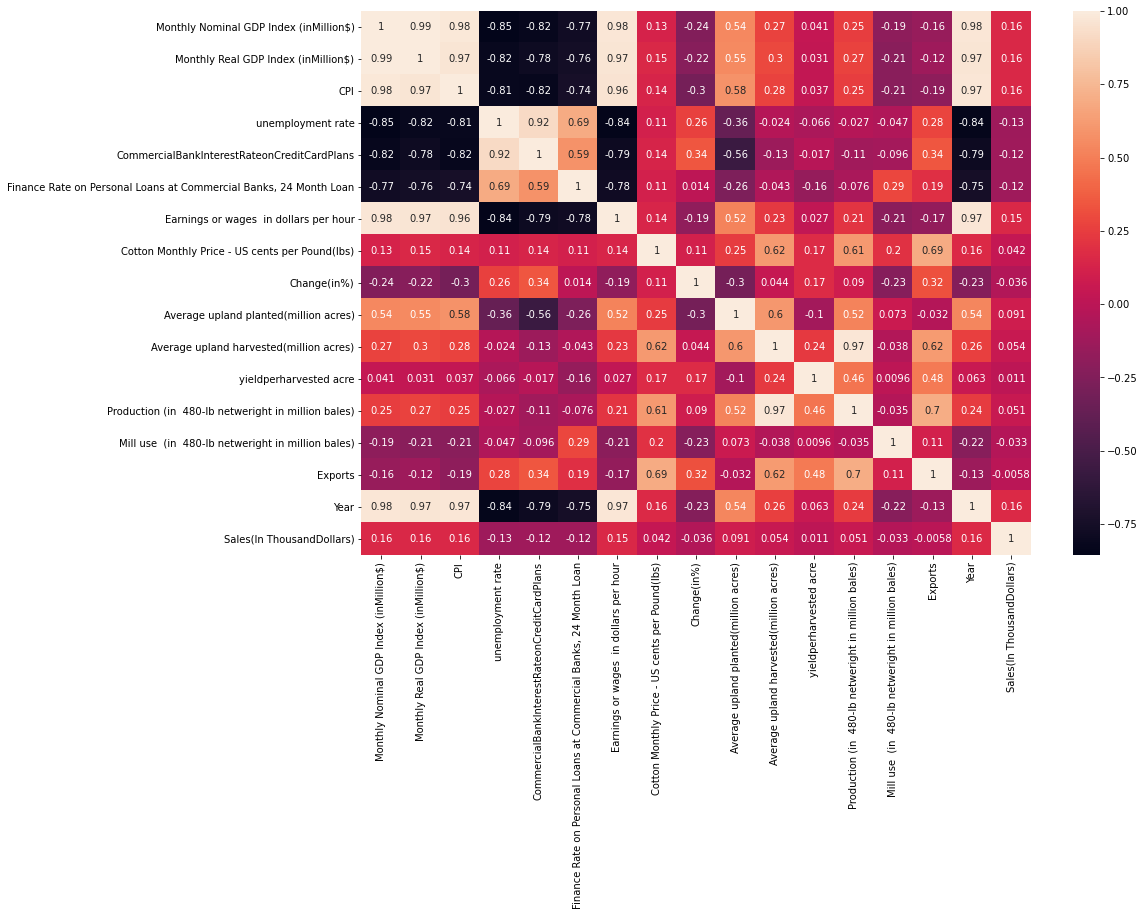

In [120]:
corr = final_data.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=True)
plt.plot()

In [121]:
final_data.columns

Index(['Monthly Nominal GDP Index (inMillion$)',
       'Monthly Real GDP Index (inMillion$)', 'CPI', 'unemployment rate',
       'CommercialBankInterestRateonCreditCardPlans',
       'Finance Rate on Personal Loans at Commercial Banks, 24 Month Loan',
       'Earnings or wages  in dollars per hour',
       'Cotton Monthly Price - US cents per Pound(lbs)', 'Change(in%)',
       'Average upland planted(million acres)',
       'Average upland harvested(million acres)', 'yieldperharvested acre',
       'Production (in  480-lb netweright in million bales)',
       'Mill use  (in  480-lb netweright in million bales)', 'Exports', 'Year',
       'Sales(In ThousandDollars)'],
      dtype='object')

In [262]:
X = final_data.drop('Sales(In ThousandDollars)', axis=1)
y = final_data['Sales(In ThousandDollars)']

In [263]:
Xtrain,Xtest, ytrain,ytest = train_test_split(X,y,test_size=0.2,random_state=10)

In [264]:
Xtrain.shape

(29990, 16)

In [265]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [266]:
# training top n models
dt = DecisionTreeRegressor(random_state=0)
etr = ExtraTreesRegressor() 
xgb_clf = XGBRegressor(objective='reg:linear', nthread= 4, n_estimators= 500, max_depth= 6, learning_rate= 0.5) 
rfr = RandomForestRegressor(n_estimators = 400,max_depth=36,n_jobs=4)

In [267]:
fd = final_data.iloc[:,:16]

In [268]:
fd.columns

Index(['Monthly Nominal GDP Index (inMillion$)',
       'Monthly Real GDP Index (inMillion$)', 'CPI', 'unemployment rate',
       'CommercialBankInterestRateonCreditCardPlans',
       'Finance Rate on Personal Loans at Commercial Banks, 24 Month Loan',
       'Earnings or wages  in dollars per hour',
       'Cotton Monthly Price - US cents per Pound(lbs)', 'Change(in%)',
       'Average upland planted(million acres)',
       'Average upland harvested(million acres)', 'yieldperharvested acre',
       'Production (in  480-lb netweright in million bales)',
       'Mill use  (in  480-lb netweright in million bales)', 'Exports',
       'Year'],
      dtype='object')

In [269]:
sc_X = StandardScaler()
X = pd.DataFrame(sc_X.fit_transform(Xtrain), columns=fd.columns)

In [270]:
X.head()

,Monthly Nominal GDP Index (inMillion$),Monthly Real GDP Index (inMillion$),CPI,unemployment rate,CommercialBankInterestRateonCreditCardPlans,"Finance Rate on Personal Loans at Commercial Banks, 24 Month Loan",Earnings or wages in dollars per hour,Cotton Monthly Price - US cents per Pound(lbs),Change(in%),Average upland planted(million acres),Average upland harvested(million acres),yieldperharvested acre,Production (in 480-lb netweright in million bales),Mill use (in 480-lb netweright in million bales),Exports,Year
0,0.677980,0.722846,0.744125,-0.526502,-0.584525,0.302849,0.894574,0.019270,-0.078324,1.783606,0.162437,-0.826109,-0.062366,-0.827236,-0.564099,0.735138
1,0.908550,0.840758,1.036570,-0.969769,-1.078631,-1.109555,0.986264,-0.394069,-0.188593,0.544997,1.026313,-0.754941,0.724675,-0.815171,-0.379430,0.735138
2,0.855895,0.936269,0.699960,-0.526502,-0.939268,0.438657,0.695912,-0.398733,0.115259,0.694790,0.994226,-0.790525,0.685095,-0.815171,-0.194761,0.735138
3,1.630784,1.618987,1.370130,-1.634668,-1.167317,-1.761434,1.551687,-0.259312,-0.252305,-0.520733,-1.132554,-0.648188,-1.176506,-0.181791,-1.189131,1.441042
4,1.338215,1.284725,1.349175,-1.302218,-1.078631,-1.191040,1.368307,-0.162651,-0.090576,-0.690391,-0.874214,-0.363515,-0.882162,-0.211952,-0.791383,1.441042


In [271]:
X.shape

(29990, 16)

In [272]:
X.columns

Index(['Monthly Nominal GDP Index (inMillion$)',
       'Monthly Real GDP Index (inMillion$)', 'CPI', 'unemployment rate',
       'CommercialBankInterestRateonCreditCardPlans',
       'Finance Rate on Personal Loans at Commercial Banks, 24 Month Loan',
       'Earnings or wages  in dollars per hour',
       'Cotton Monthly Price - US cents per Pound(lbs)', 'Change(in%)',
       'Average upland planted(million acres)',
       'Average upland harvested(million acres)', 'yieldperharvested acre',
       'Production (in  480-lb netweright in million bales)',
       'Mill use  (in  480-lb netweright in million bales)', 'Exports',
       'Year'],
      dtype='object')

In [276]:
tuned_parameters = [{'alpha':[0.0001, 0.001, 0.01, 0.1, 1]}]
#enet = ElasticNet()
enet_grid = GridSearchCV(estimator = final,param_grid=tuned_parameters,cv=5)
enet_grid.fit(X,ytrain)
print('Best parameters',enet_grid.best_params_, '\n')

TypeError: estimator should be an estimator implementing 'fit' method, array([1320.0069478, 1320.0069478, 1320.0069478, 1320.0069478,
       1320.0069478, 1320.0069478, 1320.0069478, 1320.0069478,
       1320.0069478, 1320.0069478, 1320.0069478, 1320.0069478,
       1320.0069478, 1320.0069478, 1320.0069478, 1320.0069478,
       1320.0069478, 1320.0069478, 1320.0069478, 1320.0069478,
       1320.0069478, 1320.0069478, 1320.0069478, 1320.0069478,
       1320.0069478, 1320.0069478, 1320.0069478, 1320.0069478,
       1320.0069478, 1320.0069478, 1320.0069478, 1320.0069478,
       1320.0069478, 1320.0069478, 1320.0069478, 1320.0069478]) was passed

In [275]:
X.drop(['CommercialBankInterestRateonCreditCardPlans',
       'Finance Rate on Personal Loans at Commercial Banks, 24 Month Loan',
       'Earnings or wages  in dollars per hour',
       'Cotton Monthly Price - US cents per Pound(lbs)', 'Change(in%)',
       'Average upland planted(million acres)',
       'Average upland harvested(million acres)', 'yieldperharvested acre',
       'Production (in  480-lb netweright in million bales)',
       'Mill use  (in  480-lb netweright in million bales)', 'Exports'], axis=1, inplace=True)

In [277]:
submission.shape

(36, 5)

In [280]:
dt.fit(X,ytrain)

DecisionTreeRegressor(random_state=0)

In [281]:
etr.fit(X,ytrain)

ExtraTreesRegressor()

In [282]:
xgb_clf.fit(X,ytrain)

[02:47:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.5, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=500, n_jobs=4, nthread=4, num_parallel_tree=1,
             objective='reg:linear', random_state=0, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [283]:
rfr.fit(X,ytrain)

RandomForestRegressor(max_depth=36, n_estimators=400, n_jobs=4)

In [242]:
submission.columns

Index(['Year', 'Month', 'ProductCategory_MenClothing',
       'ProductCategory_OtherClothing', 'ProductCategory_WomenClothing'],
      dtype='object')

In [243]:
submission.head()

,Year,Month,ProductCategory_MenClothing,ProductCategory_OtherClothing,ProductCategory_WomenClothing
0,2014,1,0,0,1
1,2014,1,1,0,0
2,2014,1,0,1,0
3,2014,2,0,0,1
4,2014,2,1,0,0


In [244]:
etr_pred=etr.predict(submission)

In [245]:
xgb_clf_pred=xgb_clf.predict(submission)
rfr_pred=rfr.predict(submission)
dt_pred = dt.predict(submission)

In [256]:
final = (etr_pred + xgb_clf_pred + rfr_pred + dt_pred)/4.0

In [250]:
last_attempt1 = pd.DataFrame({'Year':np.arange(1,37),'Sales(In ThousandDollars)':etr_pred})
last_attempt1.to_csv('last_attempt1.csv', index=None)

In [251]:
last_attempt2 = pd.DataFrame({'Year':np.arange(1,37),'Sales(In ThousandDollars)':xgb_clf_pred})
last_attempt2.to_csv('last_attempt2.csv', index=None)

In [252]:
last_attempt3 = pd.DataFrame({'Year':np.arange(1,37),'Sales(In ThousandDollars)':rfr_pred})
last_attempt3.to_csv('last_attempt3.csv', index=None)

In [253]:
last_attempt4 = pd.DataFrame({'Year':np.arange(1,37),'Sales(In ThousandDollars)':dt_pred})
last_attempt4.to_csv('last_attempt4.csv', index=None)

In [257]:
last_attempt5 = pd.DataFrame({'Year':np.arange(1,37),'Sales(In ThousandDollars)':final})
last_attempt5.to_csv('last_attempt5.csv', index=None)